In [1]:
!pip install researchpy

### When the variances of the 2 samples are not same we use wlech's t-test.

---



In [0]:
#import all the necessary packages
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from matplotlib import style
style.use('ggplot')
import researchpy as rp
from scipy import stats


In [0]:
bike_sharing_data = pd.read_csv('/content/drive/My Drive/hypothesis_exercise_file/02/demos/datasets/bike_sharing_data_processed.csv') 

In [4]:
bike_sharing_data.shape #checking shape of the data

(731, 7)

In previous notebook we saw that the working day had no significant effect on number of rentals. Now we want to see whether the temperature has any significant effect on number of rentals.

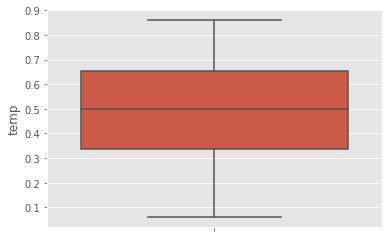

In [5]:
#t-test is used only when we have categorical feature but the temperature here is continuous feature
#convert temperature in categorical variable
sns.boxplot(y = 'temp',data=bike_sharing_data)
plt.show()

Here we can see that the minumum value is 0 and maximum is 1.
* The data is distributed between 0 and 1.
* Median is 0.5 

In [6]:
bike_sharing_data['temp'].describe() #checking the description of temperature

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [0]:
#Let's create a new categorical variable 'temp_category' if temp > mean we will assign 1 otherwise 0
bike_sharing_data['temp_category'] = bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [8]:
bike_sharing_data.head(5)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
0,1,1,0,0,2,0.344167,985,False
1,1,1,0,0,2,0.363478,801,False
2,1,1,0,1,1,0.196364,1349,False
3,1,1,0,1,1,0.200000,1562,False
4,1,1,0,1,1,0.226957,1600,False


In [9]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


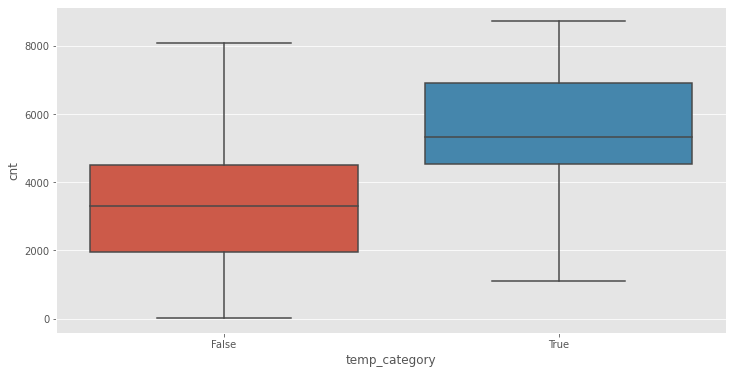

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'temp_category', y = 'cnt', data = bike_sharing_data)
plt.show()  

In [0]:
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category']==True)]  
sample_02 = bike_sharing_data[(bike_sharing_data['temp_category']==False)]

In [12]:
sample_01.shape,sample_02.shape

((367, 8), (364, 8))

In [0]:
#Here we have 367 observations in sample_01 and 364 samples in sample_02
#let's make equal number of observations in both samples
sample_01 = sample_01.sample(364)

In [14]:
sample_01.shape,sample_02.shape

((364, 8), (364, 8))

In [0]:
#Levene's test to check whether the variances of the two group are same.
#H0 : Variances are same.
#H1 : Variances are not same.
#Alpha = 0.05%
#if p-value > alpha (Fail to reject H0)
#if p-value < alpha (Accept null hypothesis)

In [19]:
#Levene's test to check the variances of 2 samples
alpha = 0.5
statistics,p_value = stats.levene(sample_01['cnt'],sample_02['cnt'])
if p_value > alpha:
  print('Fail to reject null hypothesis \n p_value: {}'.format(p_value))
else:
  print('Reject Null Hypothesis \n p_value: {}'.format(p_value))

Reject Null Hypothesis 
 p_value: 0.029105602686617597


We can see that p-value is less than alpha so we have to reject the null hypothesis.
Variances of the 2 samples are not equal.

### Check For Normality

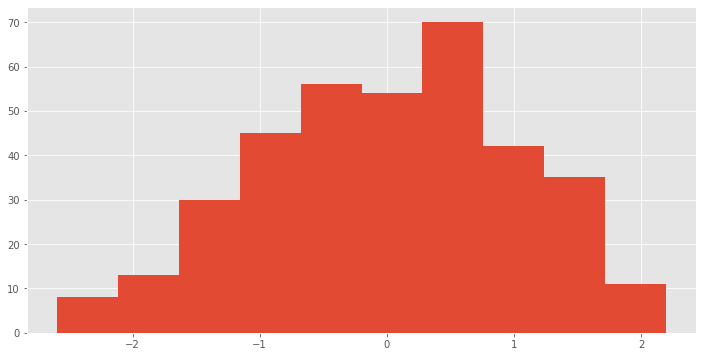

In [23]:
#take the residuals of the 2 samples and scale the difference
#plot the scaled residual to see the distribution
plt.figure(figsize=(12,6))
diff = scale(np.array(sample_01['cnt'])-np.array(sample_02['cnt']))
plt.hist(diff)
plt.show()

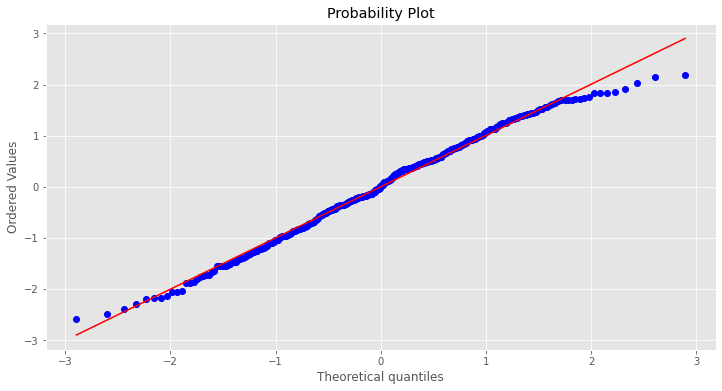

In [24]:
#q-q plot to check normality
plt.figure(figsize=(12,6))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

In [0]:
#Our Data is almost normally distributed

In [28]:
#Let's use shapiro-wilk test to check normality
#H0 : Residuals are normally distributed
#H1 : Residuals are not normally distributed
alpha = 0.05
statisctics,p_value = stats.shapiro(diff)
if p_value > alpha:
  print('Failed to reject null hypothesis \n P-value: {}'.format(p_value))
else:
  print('Reject null hypothesis \n P-value: {}'.format(p_value))

Reject null hypothesis 
 P-value: 0.01899157464504242


The pvalue is less than alpha. So we reject the null hypothesis and accept that our data is not normally distributed.



---
Using Levene's test we have seen that the variances of the two samples are not equal. So here it voilates the assumption of t-test. 
In the scenario when the variances are not same b/w the samples we use Welch's t-test.


---



In [0]:
#we use researchpy library to perfrom welch's t-test
#we will specify the parameter 'equal_variances = False' as the sample variances are not equal 
descriptives,result = rp.ttest(sample_01['cnt'],sample_02['cnt'],equal_variances=False)

In [30]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5625.343407,1471.791645,77.142843,5473.640413,5777.046400
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4506.504121,1939.965732,71.899914,4365.347879,4647.660363


In [31]:
result

,Welch's t-test,results
0,Difference (cnt - cnt) =,2237.6786
1,Degrees of freedom =,712.4032
2,t =,19.0416
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.4115
7,Hedge's g =,1.4100
8,Glass's delta =,1.5204
9,r =,0.5808


In [0]:
#Here we can see that p-value is less than alpha so we reject the null hypothesis and accept the alternate
#We can say that temperature has significant effect on number of rentals.